IMPORT THƯ VIỆN

In [2]:
import numpy as np 
import pandas as pd 

In [4]:
Pima_dataset = pd.read_csv('diabetes.csv') # đọc file dữ liệu
Pima_dataset.head(5) # in 5 dòng dữ liệu

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = Pima_dataset.drop(columns='Outcome', axis=1) # xóa cột outcome để lấy dữ liệu đầu vào
Y = Pima_dataset['Outcome'] # outcome là dữ liệu đầu ra

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0) # chia dữ liệu test

In [8]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info


array([0.01555395, 0.11340361, 0.01509219, 0.01042158, 0.02731686,
       0.07740352, 0.        , 0.04601336])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.113404
BMI                         0.077404
Age                         0.046013
Insulin                     0.027317
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010422
DiabetesPedigreeFunction    0.000000
dtype: float64

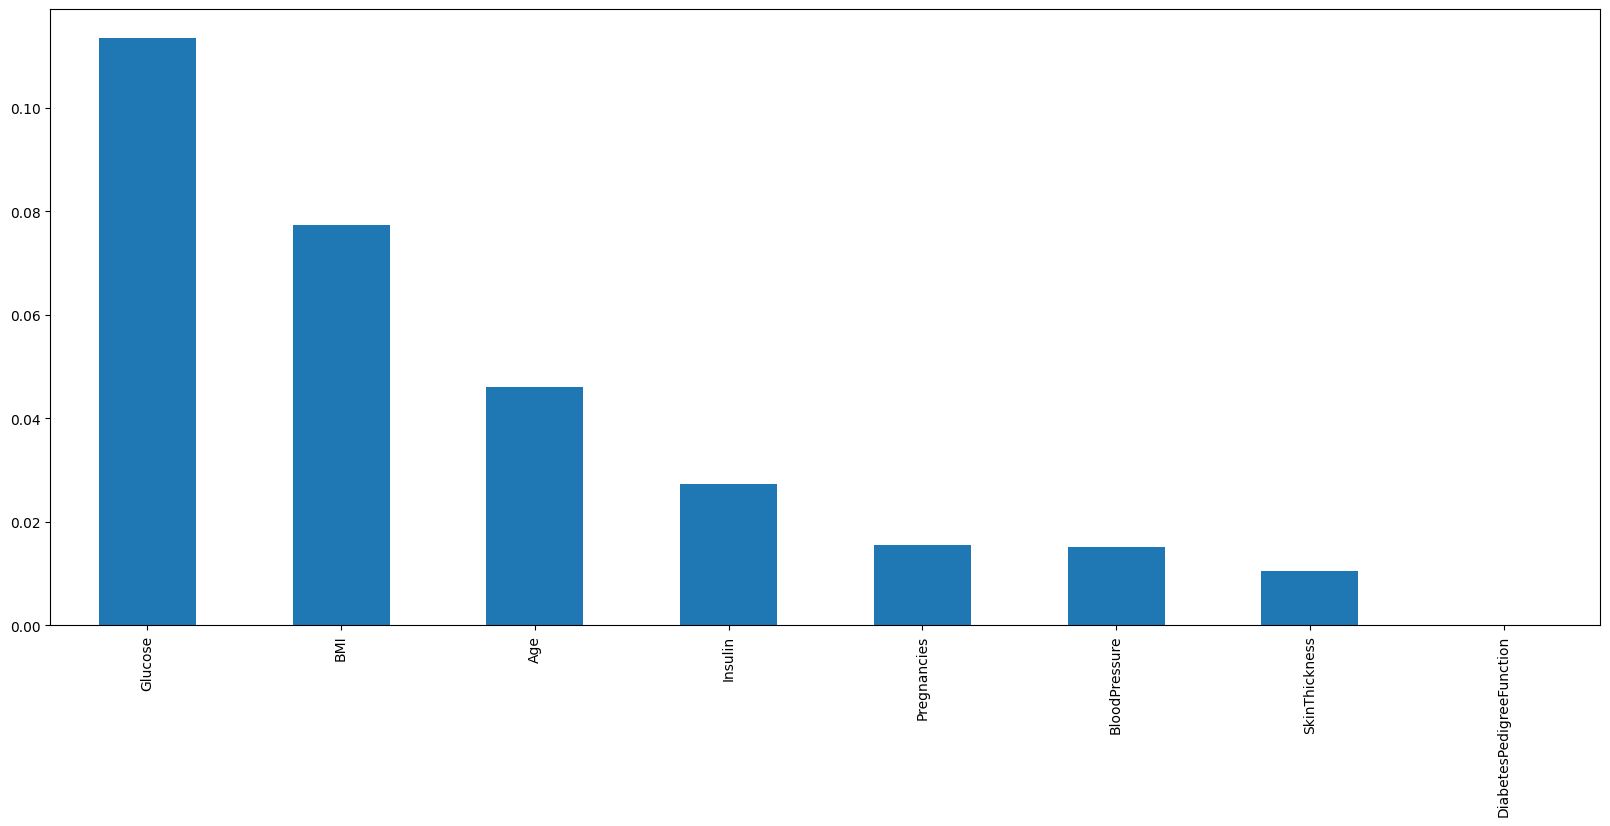

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [12]:
Pima_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [14]:
X = Pima_dataset.drop(columns='Insulin', axis=1)
Y = Pima_dataset['Insulin']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [16]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=10,learning_rate=0.1)
XGB.fit(X_train,y_train)

predictions_xgb = XGB.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error
#mean square error
final_mse = mean_squared_error(y_test, predictions_xgb)
#mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(85.79124540997681)

In [44]:
RTML_dataset = pd.read_csv('Raw_RTML.csv')
RTML_dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,NaN
1,6,73.8,74.0,7.5,24.851410,50,0,NaN
2,1,86.4,87.0,18.4,41.621307,30,0,NaN


In [45]:
RTML_dataset.isna().sum()

Pregnancies        0
Glucose            0
BloodPressure      0
SkinThickness      0
BMI                0
Age                0
Outcome            0
Insulin          109
dtype: int64

In [46]:
X1 = RTML_dataset.drop(columns='Insulin', axis=1)
Y1 = RTML_dataset['Insulin']

In [47]:
Y1 = XGB.predict(X1)

In [48]:
Y1.shape

(109,)

In [49]:
Y2= pd.DataFrame(Y1)

In [50]:
Y2.columns=['Insulin']

In [51]:
Y2.head()

,Insulin
0,204.799011
1,211.457794
2,119.480362
3,67.878632
4,220.453064


In [52]:
Y2.shape

(109, 1)

# **Merging The insulin column**

In [53]:
RTML_dataset.columns
RTML_dataset.shape

(109, 8)

In [54]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,NaN
1,6,73.8,74.0,7.5,24.851410,50,0,NaN
2,1,86.4,87.0,18.4,41.621307,30,0,NaN
3,1,97.2,71.0,15.0,22.608427,28,0,NaN
4,5,90.0,96.0,7.6,19.154528,50,0,NaN


In [55]:
RTML_dataset.drop(columns='Insulin',axis=1, inplace=True)

In [56]:
RTML_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome
0,5,88.2,106.0,4.8,14.794213,50,0
1,6,73.8,74.0,7.5,24.851410,50,0
2,1,86.4,87.0,18.4,41.621307,30,0
3,1,97.2,71.0,15.0,22.608427,28,0
4,5,90.0,96.0,7.6,19.154528,50,0


In [57]:
Y2.columns
Y2.shape

(109, 1)

In [58]:
Y2.head()

,Insulin
0,204.799011
1,211.457794
2,119.480362
3,67.878632
4,220.453064


In [59]:
Insulin_Merged = pd.concat([RTML_dataset, Y2], axis=1)


Insulin_Merged.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'Age', 'Outcome', 'Insulin'],
      dtype='object')

In [60]:
Insulin_Merged.shape

(109, 8)

In [61]:
Insulin_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,Age,Outcome,Insulin
0,5,88.2,106.0,4.8,14.794213,50,0,204.799011
1,6,73.8,74.0,7.5,24.851410,50,0,211.457794
2,1,86.4,87.0,18.4,41.621307,30,0,119.480362
3,1,97.2,71.0,15.0,22.608427,28,0,67.878632
4,5,90.0,96.0,7.6,19.154528,50,0,220.453064
5,0,70.2,83.0,6.7,23.051801,18,0,89.467163
6,3,84.6,74.0,4.2,14.130982,40,0,182.764648
7,3,95.4,84.0,15.0,39.700324,30,0,123.660027
8,0,88.2,74.0,4.5,16.567359,18,0,113.151321
9,0,79.2,67.0,12.5,21.518855,18,0,112.172615


# **Merge with PIMA DATASET**

In [62]:
RTML_Merged = Insulin_Merged[["Pregnancies", "Glucose", "BloodPressure","SkinThickness","Insulin", "BMI", "Age","Outcome"]]

In [63]:
RTML_Merged.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,5,88.2,106.0,4.8,204.799011,14.794213,50,0
1,6,73.8,74.0,7.5,211.457794,24.851410,50,0
2,1,86.4,87.0,18.4,119.480362,41.621307,30,0
3,1,97.2,71.0,15.0,67.878632,22.608427,28,0
4,5,90.0,96.0,7.6,220.453064,19.154528,50,0
5,0,70.2,83.0,6.7,89.467163,23.051801,18,0
6,3,84.6,74.0,4.2,182.764648,14.130982,40,0
7,3,95.4,84.0,15.0,123.660027,39.700324,30,0
8,0,88.2,74.0,4.5,113.151321,16.567359,18,0
9,0,79.2,67.0,12.5,112.172615,21.518855,18,0


In [64]:
pieces = {"x": Pima_dataset, "y": RTML_Merged}

PIMA_RTML = pd.concat(pieces)

In [65]:
PIMA_RTML.shape

(877, 8)

In [66]:
PIMA_RTML.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
x 0            6    148.0      72.000000       35.00000  155.548223   
  1            1     85.0      66.000000       29.00000  155.548223   
  2            8    183.0      64.000000       29.15342  155.548223   
  3            1     89.0      66.000000       23.00000   94.000000   
  4            0    137.0      40.000000       35.00000  168.000000   
  5            5    116.0      74.000000       29.15342  155.548223   
  6            3     78.0      50.000000       32.00000   88.000000   
  7           10    115.0      72.405184       29.15342  155.548223   
  8            2    197.0      70.000000       45.00000  543.000000   
  9            8    125.0      96.000000       29.15342  155.548223   

           BMI  Age  Outcome  
x 0  33.600000   50        1  
  1  26.600000   31        0  
  2  23.300000   32        1  
  3  28.100000   21        0  
  4  43.100000   33        1  
  5  25.600000   30        0  
  6  31.000000   26        1  
  7  35.300000   29        0  
  8  30.500000   53        1  
  9  32.457464   54        1

# **Split the Data**

In [67]:
X = PIMA_RTML.drop(columns='Outcome', axis=1)
Y = PIMA_RTML['Outcome']

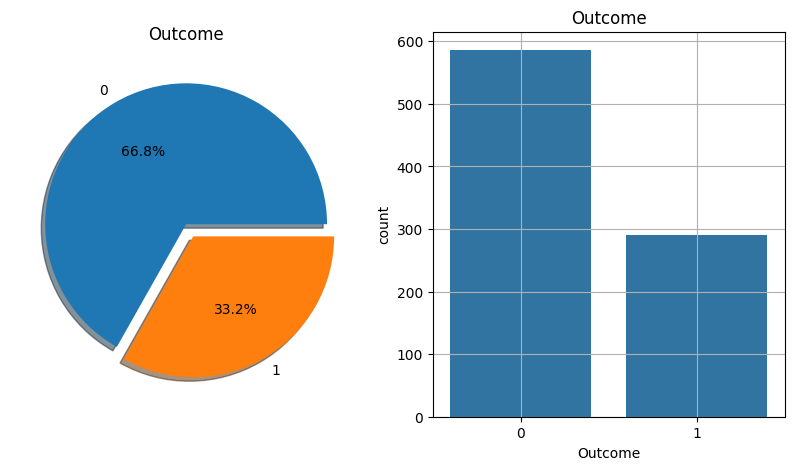

In [70]:
import seaborn as sns
f,ax = plt.subplots(1,2, figsize=(10,5))
PIMA_RTML['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=PIMA_RTML, ax=ax[1])
ax[1].set_title('Outcome')
N,P = PIMA_RTML['Outcome'].value_counts()

plt.grid()
plt.show()

In [71]:
PIMA_RTML['Outcome'].value_counts()

Outcome
0    586
1    291
Name: count, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y)

In [73]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(877, 7) (701, 7) (701,) (176, 7)


data.to_csv("output_combine.csv", index=False)  # Không

In [74]:
PIMA_RTML.to_csv("output_combine.csv", index=False) #Không lưu cột chỉ số (index)
